### Projeto de avaliação da disciplina Introdução à Análise de Dados - Prof. Luciano Barbosa
#### Alunos: David Soares (dsm3@cin.ufpe.br) & Wanderson R. Marques (wrm@cin.ufpe.br)

#### Importação das Bibliotecas e do Dataset

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# Importação dataset
df = pd.read_csv('Focos_2021-01-01_2021-08-31.csv')

In [100]:
# Número de linhas e colunas do DataSet
df.shape

(10448, 12)

In [101]:
# Amostra do dataset
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021/01/01 17:00:00,AQUA_M-T,Brasil,PARA,SANTA MARIA DAS BARREIRAS,Amazonia,NaN,NaN,NaN,-8.577,-49.952,8.8
1,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,AVEIRO,Amazonia,NaN,NaN,NaN,-3.909,-56.037,18.9
2,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,AVEIRO,Amazonia,NaN,NaN,NaN,-3.904,-56.045,9.5
3,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,JACAREACANGA,Amazonia,NaN,NaN,NaN,-5.845,-57.716,149.8
4,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,ORIXIMINA,Amazonia,NaN,NaN,NaN,-1.587,-55.922,11.3


In [117]:
# Principais estatíscas descritivas dos dados
df.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000
mean,13.182850,0.647454,0.673278,-6.002143,-53.505437,84.375064
std,15.701166,2.910498,0.345792,2.090318,2.761158,187.332087
min,0.000000,0.000000,0.000000,-9.791000,-58.437100,3.200000
25%,4.000000,0.000000,0.400000,-7.385388,-55.454228,16.400000
50%,7.000000,0.000000,0.800000,-6.467755,-54.777885,32.500000
75%,15.000000,0.000000,1.000000,-5.030550,-51.683982,75.800000
max,110.000000,48.200000,1.000000,2.315000,-46.218000,3543.400000


### Pré-processamento dos Dados

#### Definição de Tipos

In [102]:
# Visualização dos tipos
df.dtypes

datahora         object
satelite         object
pais             object
estado           object
municipio        object
bioma            object
diasemchuva     float64
precipitacao    float64
riscofogo       float64
latitude        float64
longitude       float64
frp             float64
dtype: object

In [103]:
# Ajuste dos Tipos
df['datahora'] = pd.to_datetime(df['datahora'], format="%Y/%m/%d %H:%M:%S")
df['satelite'] = df['satelite'].astype('category')
df['pais'] = df['pais'].astype('category')
df['estado'] = df['estado'].astype('category')
df['municipio'] = df['municipio'].astype('category')
df['bioma'] = df['bioma'].astype('category')

In [104]:
# Verificação dos tipos após modificação
df.dtypes

datahora        datetime64[ns]
satelite              category
pais                  category
estado                category
municipio             category
bioma                 category
diasemchuva            float64
precipitacao           float64
riscofogo              float64
latitude               float64
longitude              float64
frp                    float64
dtype: object

#### Removendo colunas irrelevantes 

As colunas foram removidas porque todas as linhas continham as mesmas informações, a saber: **país(Brasil), estado(Pará), satélite(AQUA_M-T), bioma(Amazonia)**.

In [105]:
df = df.drop(columns=['pais','estado','satelite','bioma'])

**Remoção de linhas** com dados ausentes, usando o risco de fogo como filtro, pois o cálculo do risco de fogo depende diretamente do conhecimento dos dias sem chuva e do volume de precipitação para aquele dia. Portanto, se a informação do risco de fogo é ausente, implica que a informação dos dias sem chuva e precipitação também é ausente.

In [106]:
# Remoção de linhas especificando a coluna "riscofogo"
df.dropna(subset=["riscofogo"], inplace=True)

In [107]:
# Reiniciando os índices 
df.reset_index(inplace=True,drop=True)
df.head()

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021-01-04 17:35:00,ORIXIMINA,1.0,2.5,0.5,2.066,-55.929,12.6
1,2021-01-05 16:40:00,MOJU,0.0,15.6,0.0,-3.039,-49.437,13.9
2,2021-01-05 16:40:00,CAPITAO POCO,2.0,0.7,0.0,-1.931,-47.215,9.2
3,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.014,-46.658,18.9
4,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.015,-46.667,9.3


**Removendo as linhas** nas quais o "riscofogo" é igual a -999, pois isso representa um código de erro desse parâmetro.

In [108]:
indexNames = df[(df['riscofogo'] == -999)].index
df.drop(indexNames, inplace=True)

In [109]:
# Verificando se ainda existe algum valor do "riscofogo" igual a -999
df[df['riscofogo'] == -999]['riscofogo'].count()

0

In [110]:
# Substituição dos valores inválidos (-999) por zero
df['diasemchuva'] = df['diasemchuva'].replace(-999,0)

In [111]:
# Verificação do resultado da operação anterior
df[df['diasemchuva'] == -999]['diasemchuva'].count()

0

In [112]:
df.head()

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021-01-04 17:35:00,ORIXIMINA,1.0,2.5,0.5,2.066,-55.929,12.6
1,2021-01-05 16:40:00,MOJU,0.0,15.6,0.0,-3.039,-49.437,13.9
2,2021-01-05 16:40:00,CAPITAO POCO,2.0,0.7,0.0,-1.931,-47.215,9.2
3,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.014,-46.658,18.9
4,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.015,-46.667,9.3


### Normalização e Discretização

#### Discretização

**Critério usado para a escolha dos intervalos de discretização:** Baseado na classificação do risco de fogo determinada pelo Programa Queimadas do INPE.

In [113]:
# Definição dos intervalos para discretização da coluna 'riscofogo'
nomes_intervalo = ['RF Mínimo','RF Baixo','RF Médio','RF Alto','RF Crítico']
intervalos = [-0.10, 0.14, 0.40, 0.70, 0.95, 1.00]

df['categorias_riscofogo'] = pd.cut(df['riscofogo'], intervalos, labels=nomes_intervalo)

In [114]:
# Visualização da coluna criada com a discretização
df.head()

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,categorias_riscofogo
0,2021-01-04 17:35:00,ORIXIMINA,1.0,2.5,0.5,2.066,-55.929,12.6,RF Médio
1,2021-01-05 16:40:00,MOJU,0.0,15.6,0.0,-3.039,-49.437,13.9,RF Mínimo
2,2021-01-05 16:40:00,CAPITAO POCO,2.0,0.7,0.0,-1.931,-47.215,9.2,RF Mínimo
3,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.014,-46.658,18.9,RF Médio
4,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.015,-46.667,9.3,RF Médio


In [115]:
# Número de ocorrências por categoria em ordem decrescente
df['categorias_riscofogo'].value_counts()

RF Alto       3320
RF Crítico    2582
RF Médio      1693
RF Mínimo     1593
RF Baixo       946
Name: categorias_riscofogo, dtype: int64

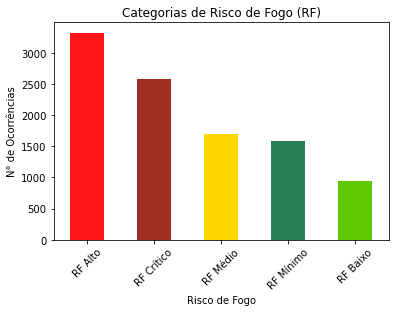

In [116]:
# Exibição das categorias em forma de gráfico
contagens = df['categorias_riscofogo'].value_counts()

cores = '#FF1616 #9F2D21 #FFD700 #277E57 #5EC700'
contagens.plot.bar(rot=45, color=cores.split())
plt.title('Categorias de Risco de Fogo (RF)')
plt.xlabel('Risco de Fogo')
plt.ylabel('N° de Ocorrências')
plt.show()

**Conclusões obtidas com a discretização:** No intervalo de tempo analisado no dataset, verificou-se a maior incidência de ocorrências de risco de fogo alto e risco de fogo crítico. Deste fato pode-se concluir que a probabilidade de ocorrência de focos de incêndio para a região em questão foi muito elevada.